In [1]:
#  Nov 2023
# Just moved everything into python.
# So slow but works. 
# The intention was to use put a point cloud file containing occupancy grid of a cube
# showing the cooridinates of values where they were 1. Then put this point cloud into
# data/forest/ folder and replace the former one which used a bunch of .mat files (fea_data.mat,
# label.mat, and op.mat for each sample ).
# In the last version (i.e. the Matlab version), the conversion, permutes, and so forth very
# crazy. But it was fast to be honest. But readability and performance was not up to the job.

# Fixit: maybe it's slow because it reads pointcloud from a regular file and convert it to cubic 
# box again.

In [2]:
import time
import os
import math
from time import gmtime, strftime
from datetime import datetime
import torch
from torch import nn
from torch.autograd import Variable
import torch.utils.data
from torchfoldext import FoldExt
import util
from dynamicplot import DynamicPlot
from IPython.core.debugger import set_trace

from data import ROctDataset
from ROctNetmodel_32 import ROctEncoder
from ROctNetmodel_32 import ROctDecoder
import ROctNetmodel_32

In [3]:
config = util.get_args()

#config.box_code_size = 2744
config.feature_size = 80
config.hidden_size = 200
  
config.show_log_every = 1
config.save_log = False
config.save_log_every = 3
config.save_snapshot = True
config.save_snapshot_every = 50
config.no_plot = False


#  - May 20 from false to True
# config.no_cuda = False #False if using CUDA

#  + May 20 from false to True
config.no_cuda = True #False if using CUDA


config.cuda = not config.no_cuda
config.gpu = 0
config.data_path = 'data'
config.save_path = 'models'


config.batch_size = 1
config.epochs = 30
incre = 1
n_samples = 1

# #for memory test
# config.batch_size = 50
# config.epochs = 2000
# incre = 100
# n_samples = 100

config.cuda = not config.no_cuda
if config.gpu<0 and config.cuda:
    config.gpu = 1
    torch.cuda.set_device(config.gpu)

if config.cuda and torch.cuda.is_available():
    print("Using CUDA on GPU ", config.gpu)
else:
    print("Not using CUDA.")

encoder = ROctEncoder(config)
decoder = ROctDecoder(config)

Not using CUDA.


/home/sobhan/Documents/py-practice/Rocnet/RocNet-newV-pythonConversion/ROctNetmodel_32.py:79: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  m.weight.data = nn.init.xavier_uniform(m.weight.data, gain=nn.init.calculate_gain('relu'))
/home/sobhan/Documents/py-practice/Rocnet/RocNet-newV-pythonConversion/ROctNetmodel_32.py:162: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  m.weight.data = nn.init.xavier_uniform(m.weight.data, gain=nn.init.calculate_gain('relu'))
/home/sobhan/Documents/py-practice/Rocnet/RocNet-newV-pythonConversion/ROctNetmodel_32.py:28: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  m.weight.data = nn.init.xavier_uniform(m.weight.data, gain=nn.init.calculate_gain('relu'))
/home/sobhan/Documents/py-practice/Rocnet/RocNet-newV-pythonConversion/ROctNetmodel_32.py:410: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.i

In [4]:
def my_collate(batch):
    return batch
# print("Loading data ...... ", flush=True)
# roct_data = ROctDataset('/data/juncheng/modelnet40/256_32_vox/train_1',1 , 7512)#7081 4441
# #roct_data.trees = roct_data.trees[0:-1:12]
# train_iter = torch.utils.data.DataLoader(roct_data, batch_size=config.batch_size, shuffle=True, collate_fn=my_collate)
# print("DONE")

# len(roct_data.trees)

In [5]:
# decoder = torch.load('models/ae_decoder_car_32.pkl')
# encoder = torch.load('models/ae_encoder_car_32.pkl')

In [6]:
if config.cuda:
    encoder.cuda(config.gpu)
    decoder.cuda(config.gpu)

In [7]:
encoder_opt = torch.optim.Adam(encoder.parameters(), lr=5e-3)
decoder_opt = torch.optim.Adam(decoder.parameters(), lr=5e-3)

In [8]:
# + July 2023, not working..! 
# from torchsummary import summary
# summary(encoder, (1,32,32,32), batch_size=5)

In [9]:
roct_data = ROctDataset('data/forest/', base=1, incre=1)
roct_data

In [10]:
encoder = encoder.train()
decoder = decoder.train()

Start training ...... 
     Time    Epoch   Chunk  Iteration    Progress(%)  ReconLoss LabelLoss TotalLoss


/home/sobhan/miniconda3/envs/Rocnet-env/lib/python3.11/site-packages/torch/autograd/__init__.py:200: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


 00:00:16     0/30         1/1         1/1           3.3%     9347.52     8339.30   17686.82
     Time    Epoch   Chunk  Iteration    Progress(%)  ReconLoss LabelLoss TotalLoss
 00:00:30     1/30         1/1         1/1           6.7%     8625.42     7090.75   15716.17
     Time    Epoch   Chunk  Iteration    Progress(%)  ReconLoss LabelLoss TotalLoss
 00:00:46     2/30         1/1         1/1          10.0%     7908.00    32050.00   39958.00
     Time    Epoch   Chunk  Iteration    Progress(%)  ReconLoss LabelLoss TotalLoss
 00:01:07     3/30         1/1         1/1          13.3%     7268.47     4285.25   11553.72
     Time    Epoch   Chunk  Iteration    Progress(%)  ReconLoss LabelLoss TotalLoss
 00:01:22     4/30         1/1         1/1          16.7%     6659.95     6499.22   13159.17
     Time    Epoch   Chunk  Iteration    Progress(%)  ReconLoss LabelLoss TotalLoss
 00:01:38     5/30         1/1         1/1          20.0%     6096.10     6254.39   12350.49
     Time    Epoch   C

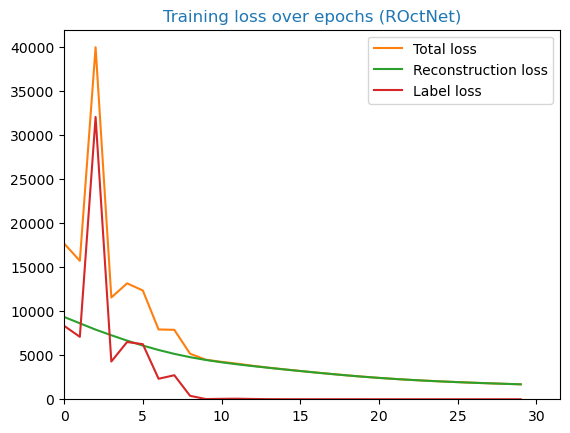

In [11]:
print("Start training ...... ")

if config.save_log:
    fd_log = open('training_log.log', mode='a')
    fd_log.write('\n\nTraining log at '+datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    fd_log.write('\n#epoch: {}'.format(config.epochs))
    fd_log.write('\nbatch_size: {}'.format(config.batch_size))
#     fd_log.write('\ncuda: {}'.format(config.cuda))
    fd_log.flush()

header = '     Time    Epoch   Chunk  Iteration    Progress(%)  ReconLoss LabelLoss TotalLoss'
log_template = ' '.join('{:>9s},{:>5.0f}/{:<5.0f},,{:>5.0f}/{:<5.0f},{:>5.0f}/{:<5.0f},{:>9.1f}%,{:>11.2f},{:>11.2f},{:>10.2f}'.split(','))

total_iter = config.epochs * math.ceil(n_samples/config.batch_size) 

if not config.no_plot:
    plot_x = [x for x in range(total_iter)]
    plot_total_loss = [None for x in range(total_iter)]
    plot_recon_loss = [None for x in range(total_iter)]
    plot_label_loss = [None for x in range(total_iter)]
    dyn_plot = DynamicPlot(title='Training loss over epochs (ROctNet)', xdata=plot_x, ydata={'Total_loss':plot_total_loss, 'Reconstruction_loss':plot_recon_loss,'Label_loss':plot_label_loss})
    iter_id = 0
    max_loss = 0
    min_loss = 0

start = time.time()

flag = True

for epoch in range(config.epochs):

    print(header)
    for base in range(1,1+n_samples,incre):
    
        if incre < n_samples or flag:
            flag = False
            #print("Loading data ...... "+str(base), end='', flush=True)
            roct_data = ROctDataset('data/forest/', base, incre)
            train_iter = torch.utils.data.DataLoader(roct_data, batch_size=config.batch_size, shuffle=True, collate_fn=my_collate)
            #valid_iter = torch.utils.data.DataLoader(valid_data, batch_size=200, shuffle=True, collate_fn=my_collate)
            #print("DONE")

        for batch_idx, batch in enumerate(train_iter):
            # Initialize torchfold for *encoding*
            enc_fold = FoldExt(cuda=config.cuda)
            enc_fold_nodes = []     # list of fold nodes for encoding
            # Collect computation nodes recursively from encoding process
            for example in batch:
                enc_fold_nodes.append(ROctNetmodel_32.encode_structure_fold(enc_fold, example))

            # Apply the computations on the encoder model
            #set_trace()
            enc_fold_nodes = enc_fold.apply(encoder, [enc_fold_nodes])

            # Split into a list of fold nodes per example
            enc_fold_nodes = torch.split(enc_fold_nodes[0], 1, 0)
            # Initialize torchfold for *decoding*
            dec_fold = FoldExt(cuda=config.cuda)
            # Collect computation nodes recursively from decoding process
            dec_fold_nodes = []
            for example, fnode in zip(batch, enc_fold_nodes):
                root_code = fnode
                dec_fold_nodes.append(ROctNetmodel_32.decode_structure_fold(dec_fold, root_code, example))
                #if epoch==config.epochs-1:
                    #sample_codes_all.append(root_code)
                    #print("finished!!!")

            # Apply the computations on the decoder model
            dec_fold_nodes1,dec_fold_nodes2 = map(list, zip(*dec_fold_nodes))

            recon_loss = dec_fold.apply(decoder, [dec_fold_nodes1])
            label_loss = dec_fold.apply(decoder, [dec_fold_nodes2])

            #set_trace()
                # the first dim of total_loss is for reconstruction and the second for KL divergence
            recon_loss = recon_loss[0].sum() / len(batch)               # avg. reconstruction loss per example
            label_loss = label_loss[0].sum() / len(batch)
            total_loss = recon_loss + label_loss
            #set_trace()

            if total_loss.data.cpu().numpy() < 500:
                for param_group in encoder_opt.param_groups:
                    param_group['lr'] = 1e-4
                for param_group in decoder_opt.param_groups:
                    param_group['lr'] = 1e-4


            # Do parameter optimization
            encoder_opt.zero_grad()
            decoder_opt.zero_grad()
            total_loss.backward()
            encoder_opt.step()
            decoder_opt.step()

            # Report statistics
            if batch_idx % config.show_log_every == 0:
                print(log_template.format(strftime("%H:%M:%S",time.gmtime(time.time()-start)),
                    epoch, config.epochs, math.ceil(base/incre) , math.ceil(n_samples/incre) ,1+batch_idx, len(train_iter),
                    100. * (1+batch_idx+len(train_iter)*epoch) / (len(train_iter)*config.epochs),
                    recon_loss.item(), label_loss.item(), total_loss.item()))
            # Plot losses
            if not config.no_plot and epoch>=0:
                plot_total_loss[iter_id] = total_loss.item()
                plot_recon_loss[iter_id] = recon_loss.item()
                plot_label_loss[iter_id] = label_loss.item()
                max_loss = max(max_loss, total_loss.item(), recon_loss.item(), label_loss.item())
                min_loss = min(min_loss, total_loss.item(), recon_loss.item(), label_loss.item())
                dyn_plot.setxlim(0., (iter_id+1)*1.05)
                dyn_plot.setylim(min_loss*1.05, max_loss*1.05)
                dyn_plot.update_plots(ydata={'Total_loss':plot_total_loss, 'Reconstruction_loss':plot_recon_loss,  'Label_loss':plot_label_loss})
                iter_id += 1
            
                # August 2023    
            if config.save_snapshot and (epoch+1) % config.save_snapshot_every == 0 :
                torch.save(encoder, "models/encoder_enitre_model")
                torch.save(decoder, "models/decoder_enitre_model")
                


        # Save snapshots of the models being trained
#         if config.save_snapshot and (epoch+1) % config.save_snapshot_every == 0 :
#             pass
#             print("Saving snapshots of the models ...... ", end='', flush=True)
#             torch.save(encoder, 'snapshots/vae_encoder_model_epoch_{}_loss_{:.2f}.pkl'.format(epoch+1, total_loss.item()))
#             torch.save(decoder, 'snapshots/vae_decoder_model_epoch_{}_loss_{:.2f}.pkl'.format(epoch+1, total_loss.item()))
#             print("DONE")
        # Save training log
#         if config.save_log and (epoch+1) % config.save_log_every == 0 : 
#             fd_log = open('training_log.log', mode='a')
#             fd_log.write('\nepoch:{} recon_loss:{:.2f} kld_loss:{:.2f} total_loss:{:.2f}'.format(epoch+1, recon_loss.item(), kldiv_loss.item(), total_loss.item()))
#             fd_log.close()

In [12]:
# Save the final models
# print("Saving final models ...... ", end='', flush=True)
# torch.save(encoder, 'models/ae_encoder_plane_128_32.pkl')
# torch.save(decoder, 'models/ae_decoder_plane_128_32.pkl')
# print("DONE")

In [13]:
# August 2023 ---> uncomment
# encoder = torch.load("models/encoder_enitre_model")
# decoder = torch.load("models/decoder_enitre_model")

In [14]:
from torch.autograd import Variable
def encode_structure(model, tree):
    """
    Encode a tree into a code
    """
    def encode_node(node,l):
        if node.is_leaf():
            if not node.is_empty_leaf():
                # - May 20
                # return model.LeafEncoder(Variable(node.fea.cuda()))
                # + May 20
                return model.LeafEncoder(Variable(node.fea))
            else:
                # - May 20
#                 return model.LeafEncoder2(Variable(node.fea.cuda()))
                # + May 20
                return model.LeafEncoder2(Variable(node.fea))
        elif node.is_expand():
            child = []
            for i in range(8):
                child.append(encode_node(node.child[i],l+1))
            mycode = 'model.NodeEncoder'+str(l)+'(child[0], child[1],child[2],child[3],child[4],child[5],child[6],child[7])'
            return eval(mycode)

    encoding = encode_node(tree.root,1)
    root_code = model.sampleEncoder(encoding)

    return root_code

In [15]:
from torch.autograd import Variable
def decode_structure(model, root_code):
    """
    Decode a root code into boxes
    """
    decode = model.sampleDecoder(root_code)
    stack = [decode]
    boxes = []
    ops = []
    depth = [1]

    while len(stack) > 0:
        f = stack.pop()
        d = depth.pop()
        label_prob = model.nodeClassifier(f)
        _, label = torch.max(label_prob,1)
        label = label.data.cpu().numpy()
#         print(label)
#         print(label_prob)
        ops.append(label)
        
        if label == 3: # NON-LEAF
            mycode = 'model.NodeDecoder'+str(d)+'(f)'
            child_feature1,child_feature2,child_feature3,child_feature4,child_feature5,child_feature6,child_feature7,child_feature8 = eval(mycode) 
            #print('non-leaf')               
            
            stack.append(child_feature8)
            stack.append(child_feature7)
            stack.append(child_feature6)
            stack.append(child_feature5)
            stack.append(child_feature4)
            stack.append(child_feature3)
            stack.append(child_feature2)
            stack.append(child_feature1)
            
            for i in range(8):
                depth.append(d+1)

                
        else:  # LEAF
            #print('leaf')
            reBox = model.leafDecoder(f)
            reBoxes = [reBox]
            boxes.extend(reBox)

    return boxes, ops

In [16]:
# decoder.sampleDecoder(code).shape

In [17]:
# decoder.nodeClassifier(decoder.sampleDecoder(code))

In [18]:
def decode_structure2(model, root_code, tree):
    """
    Decode a root code into boxes
    """
    decode = model.sampleDecoder(root_code)
    stack = [decode]
    boxes = []
    ops = []
    depth = [tree.root]
    depth2 = [1]
    
    while len(stack) > 0:
        f = stack.pop()
        d = depth.pop()
        d2 = depth2.pop()
  
        ops.append(d.label.cpu().numpy())
    
        if d.is_expand():  # NON-LEAF
            mycode = 'model.NodeDecoder'+str(d2)+'(f)'
            child_feature1,child_feature2,child_feature3,child_feature4,child_feature5,child_feature6,child_feature7,child_feature8 = eval(mycode) 
            #print('non-leaf')          
            #print('non-leaf')
            stack.append(child_feature8)
            stack.append(child_feature7)
            stack.append(child_feature6)
            stack.append(child_feature5)
            stack.append(child_feature4)
            stack.append(child_feature3)
            stack.append(child_feature2)
            stack.append(child_feature1)

            for i in range(7,-1,-1):
                depth.append(d.child[i])
            
            for i in range(8):
                depth2.append(d2+1)

                
        else:  # LEAF
            #print('leaf')
            reBox = model.leafDecoder(f)
            # -June 10, not needed
            # reBoxes = [reBox]
            boxes.extend(reBox)

    return boxes, ops

# reconst

In [19]:
# August 2023 ---> from 'train_1' folder to 'forest' folder
roct_data = ROctDataset('./data/forest/',1 , 1)#---> 1 in file name of fea_data1.mat, label_data1.mat, op_data1.mat
# roct_data.trees = roct_data.trees[0::]

In [20]:
roct_data.trees[0:]

In [21]:
#train samples reconstruction with GT octree structure
encoder = encoder.eval()
decoder = decoder.eval()
import scipy.io as sio
recons_all = []
ops_all = []
for i in range(0,1):
    code = encode_structure(encoder, roct_data.trees[i])
    recons,ops = decode_structure2(decoder, code, roct_data.trees[i])
    recons_all.append(torch.cat(recons,0).data.cpu().numpy())
#     print(recons_all[0].shape)
#     print(recons_all[0])
    ops_all.append(ops)
    print(i)
#     print(recons)

# Nov 2023. Don't need this line but still keep it to remeber what was it doing in the last v.
# sio.savemat('data/reconstructed.mat', {'recons_all':recons_all, 'ops_all':ops_all})

0


In [22]:
len(ops_all[0])

585

In [23]:
recons_all[0].shape

(512, 32, 32, 32)

In [24]:
opss = torch.tensor(ops_all[0]).reshape(1,-1)
oppss  = torch.flip(opss,(0,1))
oppss[0]

/tmp/ipykernel_13898/1305064017.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  opss = torch.tensor(ops_all[0]).reshape(1,-1)


tensor([1, 1, 2, 2, 1, 1, 2, 2, 3, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2,
        1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 2, 1, 1, 2, 2, 3, 2, 2, 2,
        2, 1, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 1, 2, 3, 2, 2, 1, 2, 2, 2, 1, 2, 3,
        3, 2, 2, 2, 2, 1, 2, 2, 2, 3, 1, 1, 2, 2, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2,
        2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1,
        2, 2, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
        3, 3, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 1, 2,
        1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2,
        2, 2, 1, 2, 2, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2,
        2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 2, 1, 1, 1, 2, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        2, 1, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 1, 2, 1,
        2, 1, 3, 3, 1, 1, 2, 2, 1, 2, 2,

In [25]:
features  = torch.from_numpy(recons_all[0])

In [26]:
# Note:
# I used to go to matalb right at this cell and did things manually. But now, Python
# directly is doing so.

In [27]:
from util import  get_tree_vox_v2
vox, label, feas_all = get_tree_vox_v2(features, oppss[0] ,vox_size=256)

In [28]:
vox.shape

torch.Size([256, 256, 256])

In [29]:
counter = 0
with open('./data/reconstructed.xyz', 'w') as f:
    for i in range(vox.shape[0]):
        for j in range(vox.shape[1]):
            for k in range(vox.shape[2]):
#                 print(mat['vox'][i][j][k])
                if (vox[i][j][k]>=0.5):
                    counter+=1
                    
                    f.write(f'{i} {j} {k}\n')
print(counter)

215213


In [30]:
# Note: (Nov 2023)
# the rest is just like before before change: still worth to take a look!
# don't delete them now from here in a hope that I'm using them in future.

In [31]:
#  go and upload data/reconstrcted.mat on matlab. and run (in matlab) the followings:
# >> recons_all = squeeze(recons_all);
# >> [vox,label,feas_all] = get_tree_vox(permute(recons_all,[2 3 4 1]),flip(ops_all),256);
# >> save('myvoxel.mat', 'vox')

# bring myvoxel.mat in data/myvoxel.mat
# continue...

In [32]:
# June 2023
# reading .mat file
import scipy.io
mat = scipy.io.loadmat('data/myvoxel.mat')

FileNotFoundError: [Errno 2] No such file or directory: 'data/myvoxel.mat'

In [ ]:
mat['vox'].shape

In [ ]:
#  + June 2023
counter = 0
with open('./data/reconstructed.xyz', 'w') as f:
    for i in range(mat['vox'].shape[0]):
        for j in range(mat['vox'].shape[1]):
            for k in range(mat['vox'].shape[2]):
#                 print(mat['vox'][i][j][k])
                if (mat['vox'][i][j][k]>=0.5):
                    counter+=1
                    
                    f.write(f'{i} {j} {k}\n')
print(counter)

In [ ]:
256*256*256

In [ ]:
# now see './data/reconstructed.xyz' in meshlab software.

In [ ]:
#================================

In [ ]:
#train samples reconstruction
encoder = encoder.eval()
decoder = decoder.eval()



import scipy.io as sio
recons_all = []
ops_all = []
for i in range(0,1):
    code = encode_structure(encoder, roct_data.trees[i])
    # + recons are boxes
    recons,ops = decode_structure(decoder, code)
    recons_all.append(torch.cat(recons,0).data.cpu().numpy()>0.5)
    ops_all.append(ops)
    print(i)
#     print(recons)
    
sio.savemat('data/reconstructed.mat', {'recons_all':recons_all, 'ops_all':ops_all},do_compression=True)

In [ ]:
#  go and upload data/reconstrcted.mat on matlab. and run (in matlab) the followings:
# >> recons_all = squeeze(recons_all);
# >> [vox,label,feas_all] = get_tree_vox(permute(recons_all,[2 3 4 1]),flip(ops_all),256);
# >> save('myvoxel.mat', 'vox')

# bring myvoxel.mat in data/myvoxel.mat
# continue...

In [ ]:
# June 2023
# readin .mat file
import scipy.io
mat = scipy.io.loadmat('data/myvoxel.mat')

In [ ]:
mat.keys()

In [ ]:
mat['vox'].shape

In [ ]:
mat['vox'][10][10][10]

In [ ]:
#  + June 2023
counter = 0
with open('./data/reconstructed.xyz', 'w') as f:
    for i in range(mat['vox'].shape[0]):
        for j in range(mat['vox'].shape[1]):
            for k in range(mat['vox'].shape[2]):
                if (mat['vox'][i][j][k]>=0.5):
                    counter+=1
                    f.write(f'{i} {j} {k}\n')
counter                    

In [ ]:
counter

In [ ]:
256*256*256

In [ ]:
print(recons_all[0].shape)

In [ ]:
len(ops_all), len(ops_all[0])

In [ ]:
code.shape, len(recons)

In [ ]:
code

In [ ]:
ops_all

In [ ]:
recons_all[0][0][10][10][10]

In [ ]:
print(len(ops_all[0]))

In [ ]:
print(recons_all[0].max())

In [ ]:
#morphing
encoder = encoder.eval()
decoder = decoder.eval()

import scipy.io as sio
import numpy
recons_all = []
ops_all = []
for i in numpy.arange(0,1,0.1):
    code1 = encode_structure(encoder, roct_data.trees[0*5])
    code2 = encode_structure(encoder, roct_data.trees[1*5])
    code = code1.mul(i) + code2.mul(1-i)
    recons,ops = decode_structure(decoder, code)
    recons_all.append(torch.cat(recons,0).data.cpu().numpy()>0.5)
    ops_all.append(ops)
    print(i)
#     print(recons)
    
sio.savemat('data/morphing.mat', {'morphing_all':recons_all, 'morphing_ops_all':ops_all},do_compression=True)

In [ ]:
#read test samples
test_data = ROctDataset('/data/juncheng/shapenetcorev2/airplane/128_32_vox/shuffled_test_1',1 , 809)
#roct_data.trees = roct_data.trees[0:-1:12]
print("DONE")

len(test_data.trees)

In [ ]:
#test samples reconstruction
encoder = encoder.eval()
decoder = decoder.eval()

import scipy.io as sio
recons_all = []
ops_all = []
for i in range(len(test_data.trees)): #len(test_data.trees)
    code = encode_structure(encoder, test_data.trees[i])
    recons,ops = decode_structure(decoder, code)
      recons_all.append(torch.cat(recons,0).data.cpu().numpy()>=0.5)
    ops_all.append(ops)
    print(i)
#     print(recons)
    
sio.savemat('data/test_reconstructed.mat', {'recons_all':recons_all, 'ops_all':ops_all},do_compression=True)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
print(str(count_parameters(encoder)/1024/1024)+'M')
print(str(count_parameters(decoder)/1024/1024)+'M')